## Machine Learning Models
in this notebook, We will use several machine learning algorithms with several scenarios to create machine learning models to analyze customer comments and classify them into positive and negative using pre-processed data. The algorithms we will use are:


1.   Support Vector Machine
2.   K-Nearest Neighbours
3.   Random Forest
4.   Decision Tree
5.   Logisitic Regression

we use this algoithmns with different techniques of rendering words as numbers ray such as tf-idf and W2V.






In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score
import joblib
from gensim.models import Word2Vec
from scipy.sparse import hstack
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# read dataset
data = pd.read_csv('/content/drive/MyDrive/classification_reviews/data/amazon_cleaned.csv')

# show the first 20 rows
data.head(20)

,Unnamed: 0,label,cleaned_text
0,65005,-1,حب تر تان قرأ كتب منتشر لي ناس تتكلم عن قصد عد...
1,6736,1,حمل قع
2,63032,-1,كتاب صغح تلخص كل دا صفح كرار طريق ظيع درج ني ق...
3,2990,1,استثنائ جميل جد موقع استراتيجي
4,50213,-1,موحش رهيب مليء حشر ذهب مرة خرى قع فندق جوار طي...
5,30288,1,نهي تو هو قاتل مي معلوف كتاب جيد جد لكن حب نظر...
6,6650,1,جميل شيء
7,6016,1,استثنائ موقع
8,7515,1,تاب قرأ غاز قصيب وقف عند معقد قصوص تب على قصوص...
9,19413,1,بدو هاروكى مبيعرفش كتب روا حط تاتش فانتازي تاع...


In [ ]:
# drop column
data.drop('Unnamed: 0', axis=1, inplace=True)
data = data.fillna('')
data.reset_index(drop=True, inplace=True)

# show the first 5 rows
data.head()

,label,cleaned_text
0,-1,حب تر تان قرأ كتب منتشر لي ناس تتكلم عن قصد عد...
1,1,حمل قع
2,-1,كتاب صغح تلخص كل دا صفح كرار طريق ظيع درج ني ق...
3,1,استثنائ جميل جد موقع استراتيجي
4,-1,موحش رهيب مليء حشر ذهب مرة خرى قع فندق جوار طي...


In [ ]:
# Extract the preprocessed text and labels from the data
X = data['cleaned_text']
y = data['label']



### we will Split the data into training and testing sets:
'X_train': Features for training

'X_test': Features for testing

'y_train': Labels for training

'y_test': Labels for testing



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a TF-IDF vectorizer with a maximum of 1000 features
vectorizer = TfidfVectorizer(max_features=1000)

# Transform the training data into TF-IDF features
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Create an SVM model with a linear kernel and regularization parameter C=1
svm_model = SVC(kernel='linear', C=1)

# Train the SVM model on the TF-IDF transformed training data and labels
svm_model.fit(X_train_tfidf, y_train)

SVC(C=1, kernel='linear')

In [ ]:
# Predict the labels using the trained SVM model and TF-IDF transformed testing data
y_pred = svm_model.predict(X_test_tfidf)

# Print a classification report to evaluate the model's performance
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)

              precision    recall  f1-score   support

          -1       0.82      0.83      0.82      6689
           1       0.83      0.81      0.82      6645

    accuracy                           0.82     13334
   macro avg       0.82      0.82      0.82     13334
weighted avg       0.82      0.82      0.82     13334



In [ ]:
# save the model
model_filename = '/content/drive/MyDrive/classification_reviews/models/svm_model.pkl'
joblib.dump(svm_model, model_filename)

['/content/drive/MyDrive/classification_reviews/models/svm_model.pkl']

### if you want load the saved model, you can use:

```
loaded_model = joblib.load(model_filename)



In [ ]:
# Word2Vec feature extraction
# Create a Word2Vec model using the training sentences
word2vec_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = word2vec_model.wv

# Function to compute document vectors using Word2Vec
def compute_doc_vector(doc):
    doc_vector = np.zeros(100)  # Initialize an array of zeros for the document vector
    words = doc.split()  # Split the document into words
    count = 0  # Initialize a count for valid words in the document
    for word in words:
        if word in word_vectors:  # Check if the word has a corresponding vector in the Word2Vec model
            doc_vector += word_vectors[word]  # Add the word vector to the document vector
            count += 1  # Increment the count
    if count != 0:
        doc_vector /= count  # Normalize the document vector by the count of valid words
    return doc_vector

# Compute document vectors for the training data using the Word2Vec model
X_train_w2v = [compute_doc_vector(doc) for doc in X_train]

# Compute document vectors for the testing data using the Word2Vec model
X_test_w2v = [compute_doc_vector(doc) for doc in X_test]

In [ ]:
# N-grams feature extraction
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000)

X_train_ngrams = vectorizer.fit_transform(X_train)
X_test_ngrams = vectorizer.transform(X_test)

In [ ]:
# Combine the two feature sets (Word2Vec and N-grams)
X_train_combined = hstack((X_train_w2v, X_train_ngrams))
X_test_combined = hstack((X_test_w2v, X_test_ngrams))


In [ ]:
# SVM model with combined features
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_combined, y_train)

# Predict and evaluate the model
y_pred = svm_model.predict(X_test_combined)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.82      0.83      0.82      6689
           1       0.83      0.81      0.82      6645

    accuracy                           0.82     13334
   macro avg       0.82      0.82      0.82     13334
weighted avg       0.82      0.82      0.82     13334



In [ ]:
# save the model
model_filename = '/content/drive/MyDrive/classification_reviews/models/svm_model2.pkl'
joblib.dump(svm_model, model_filename)

['/content/drive/MyDrive/classification_reviews/models/svm_model2.pkl']

In [ ]:
# Create an SVM model with a radial basis function (RBF) kernel and regularization parameter C=0.5
svm_model = SVC(kernel='rbf', C=0.5)

# Train the SVM model on the combined feature vectors and labels
svm_model.fit(X_train_combined, y_train)

# Predict and evaluate the model
y_pred = svm_model.predict(X_test_combined)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.82      0.84      0.83      6689
           1       0.83      0.82      0.83      6645

    accuracy                           0.83     13334
   macro avg       0.83      0.83      0.83     13334
weighted avg       0.83      0.83      0.83     13334



In [ ]:
# save the model
model_filename = '/content/drive/MyDrive/classification_reviews/models/svm_model3.pkl'
joblib.dump(svm_model, model_filename)

['/content/drive/MyDrive/classification_reviews/models/svm_model3.pkl']

In [ ]:
# Create a k-Nearest Neighbors (KNN) classifier with 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier using the TF-IDF transformed training data and labels
knn_classifier.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [ ]:
# Predict the labels using the trained KNN classifier and TF-IDF transformed testing data
y_pred = knn_classifier.predict(X_test_tfidf)

# Generate a classification report to evaluate the KNN model's performance
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

          -1       0.60      0.86      0.71      6689
           1       0.75      0.43      0.55      6645

    accuracy                           0.64     13334
   macro avg       0.68      0.64      0.63     13334
weighted avg       0.68      0.64      0.63     13334



In [ ]:
# save the model
model_filename = '/content/drive/MyDrive/classification_reviews/models/knn_model.pkl'
joblib.dump(svm_model, model_filename)

['/content/drive/MyDrive/classification_reviews/models/knn_model.pkl']

In [ ]:
# Create a Random Forest classifier with 100 decision trees and a fixed random state for reproducibility
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier using the TF-IDF transformed training data and labels
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict the labels using the trained Random Forest classifier and TF-IDF transformed testing data
rf_y_pred = rf_classifier.predict(X_test_tfidf)

# Generate a classification report to evaluate the Random Forest model's performance
rf_classification_rep = classification_report(y_test, rf_y_pred)

# Print the Random Forest classification report
print("Random Forest Classification Report:\n", rf_classification_rep)

Random Forest Classification Report:
               precision    recall  f1-score   support

          -1       0.81      0.82      0.82      6689
           1       0.82      0.80      0.81      6645

    accuracy                           0.81     13334
   macro avg       0.81      0.81      0.81     13334
weighted avg       0.81      0.81      0.81     13334



In [ ]:
# save the model
model_filename = '/content/drive/MyDrive/classification_reviews/models/rf_model.pkl'
joblib.dump(svm_model, model_filename)

['/content/drive/MyDrive/classification_reviews/models/rf_model.pkl']

In [ ]:
# Create a Decision Tree classifier with a fixed random state for reproducibility
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier using the TF-IDF transformed training data and labels
dt_classifier.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict the labels using the trained Decision Tree classifier and TF-IDF transformed testing data
dt_y_pred = dt_classifier.predict(X_test_tfidf)

# Generate a classification report to evaluate the Decision Tree model's performance
dt_classification_rep = classification_report(y_test, dt_y_pred)

# Print the Decision Tree classification report
print("Decision Tree Classification Report:\n", dt_classification_rep)

Decision Tree Classification Report:
               precision    recall  f1-score   support

          -1       0.73      0.74      0.74      6689
           1       0.74      0.73      0.73      6645

    accuracy                           0.73     13334
   macro avg       0.73      0.73      0.73     13334
weighted avg       0.73      0.73      0.73     13334



In [ ]:
# save the model
model_filename = '/content/drive/MyDrive/classification_reviews/models/dt_model.pkl'
joblib.dump(svm_model, model_filename)

['/content/drive/MyDrive/classification_reviews/models/dt_model.pkl']

In [ ]:
# Create a Logistic Regression classifier with a fixed random state for reproducibility
lr_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier using the TF-IDF transformed training data and labels
lr_classifier.fit(X_train_tfidf, y_train)


LogisticRegression(random_state=42)

In [ ]:
# Predict the labels using the trained Logistic Regression classifier and TF-IDF transformed testing data
lr_y_pred = lr_classifier.predict(X_test_tfidf)

# Generate a classification report to evaluate the Logistic Regression model's performance
lr_classification_rep = classification_report(y_test, lr_y_pred)

# Print the Logistic Regression classification report
print("Logistic Regression Classification Report:\n", lr_classification_rep)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

          -1       0.82      0.83      0.83      6689
           1       0.83      0.81      0.82      6645

    accuracy                           0.82     13334
   macro avg       0.82      0.82      0.82     13334
weighted avg       0.82      0.82      0.82     13334



In [ ]:
# save the model
model_filename = '/content/drive/MyDrive/classification_reviews/models/lr_model.pkl'
joblib.dump(svm_model, model_filename)

['/content/drive/MyDrive/classification_reviews/models/lr_model.pkl']

In [ ]:
# Load all models
svm_model = joblib.load('/content/drive/MyDrive/classification_reviews/models/svm_model.pkl')
svm_model2 = joblib.load('/content/drive/MyDrive/classification_reviews/models/svm_model2.pkl')
svm_model3 = joblib.load('/content/drive/MyDrive/classification_reviews/models/svm_model3.pkl')
knn_model = joblib.load('/content/drive/MyDrive/classification_reviews/models/knn_model.pkl')
rf_model = joblib.load('/content/drive/MyDrive/classification_reviews/models/rf_model.pkl')
dt_model = joblib.load('/content/drive/MyDrive/classification_reviews/models/dt_model.pkl')
lr_model = joblib.load('/content/drive/MyDrive/classification_reviews/models/lr_model.pkl')

In [ ]:
# Make predictions
svm_pred = svm_model.predict(X_test_tfidf)
svm_pred2 = svm_model2.predict(X_test_combined)
svm_pred3 = svm_model3.predict(X_test_combined)
knn_pred = knn_classifier.predict(X_test_tfidf)
rf_pred = rf_classifier.predict(X_test_tfidf)
dt_pred = dt_classifier.predict(X_test_tfidf)
lr_pred = lr_classifier.predict(X_test_tfidf)

In [ ]:
# Calculate f1-score for each model
models = ['SVM (Linear)', 'SVM (Combined)', 'SVM (RBF)', 'KNN', 'Random Forest', 'Decision Tree', 'Logistic Regression']
f1_scores = [
    f1_score(y_test, svm_pred),
    f1_score(y_test, svm_pred2),
    f1_score(y_test, svm_pred3),
    f1_score(y_test, knn_pred),
    f1_score(y_test, rf_pred),
    f1_score(y_test, dt_pred),
    f1_score(y_test, lr_pred)
]

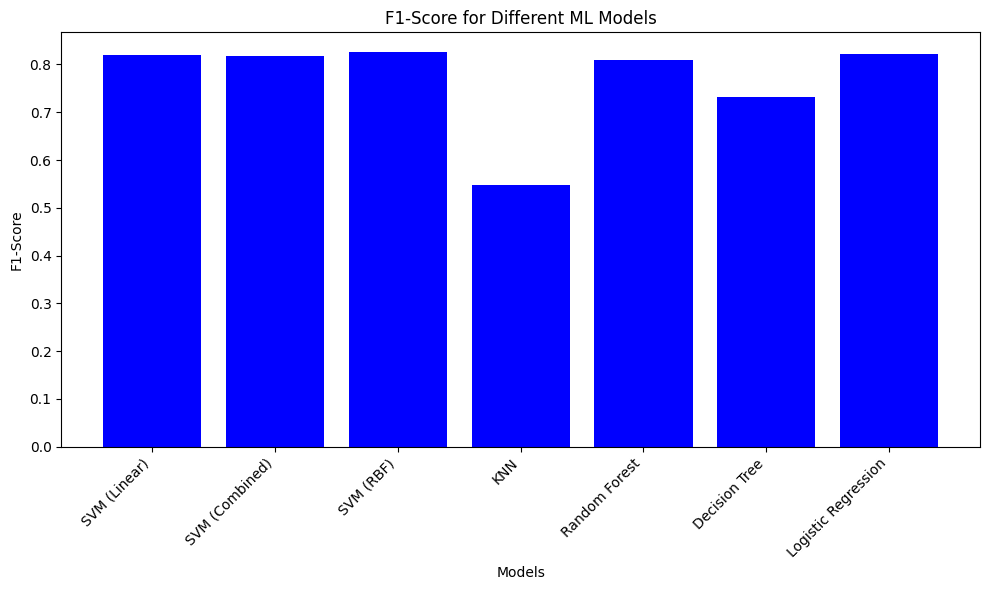

In [ ]:
# Create bar plot for f1-scores
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='blue')
plt.title('F1-Score for Different ML Models')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()